# PySpark



[Databricks link for PySpark](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/6244269837918943/3546103630347710/4066658260255490/latest.html)




In [ ]:
!pip install pyspark

ERROR: Operation cancelled by user


In [ ]:
import pyspark # importing the module
from pyspark.sql import SparkSession # importing the SparkSession module
spark = SparkSession.builder.appName('First App').getOrCreate() # creating a session
spark # calling the session variable

In [ ]:
#!wget --continue "https://raw.githubusercontent.com/iAnalyticsGeek/Datasets/master/AdultData.csv"

In [ ]:
df_adult = spark.read.csv("adult.csv", header=True)
df_adult.createOrReplaceTempView("adult")

In [ ]:
df_adult.printSchema()

root
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: string (nullable = true)
 |-- capital_loss: string (nullable = true)
 |-- hours_per_week: string (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [ ]:
df_adult.show(10)

+---+-----------------+------+-------------+-------------+--------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
|age|        workclass|fnlwgt|    education|education_num|      marital_status|        occupation|  relationship|  race|    sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+-----------------+------+-------------+-------------+--------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
| 50| Self-emp-not-inc| 83311|    Bachelors|           13|  Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|           0|           0|            13| United-States| <=50K|
| 38|          Private|215646|      HS-grad|            9|            Divorced| Handlers-cleaners| Not-in-family| White|   Male|           0|           0|            40| United-States| <=50K|
| 53|          Private|234721|         1

In [ ]:
df_adult.select("age").show(5)

+---+
|age|
+---+
| 50|
| 38|
| 53|
| 28|
| 37|
+---+
only showing top 5 rows



In [ ]:
df_adult.count()

1000

In [ ]:
cols = df_adult.columns

In [ ]:
display(df_adult)

DataFrame[age: string, workclass: string, fnlwgt: string, education: string, education_num: string, marital_status: string, occupation: string, relationship: string, race: string, sex: string, capital_gain: string, capital_loss: string, hours_per_week: string, native_country: string, income: string]

In [ ]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['occupation'],
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Divorced' , 1 ).otherwise(0).alias('is_divorced')
)
# do grouping (and a round)
df_result = df_result.groupBy('occupation').agg(round(mean('is_divorced'),2).alias('divorced_rate'))
# do ordering
df_result = df_result.orderBy(desc('divorced_rate'))
# show results
df_result.show(5)

+------------------+-------------+
|        occupation|divorced_rate|
+------------------+-------------+
|      Adm-clerical|         0.24|
|   Exec-managerial|         0.18|
|      Craft-repair|         0.15|
| Machine-op-inspct|         0.15|
|      Tech-support|         0.14|
+------------------+-------------+
only showing top 5 rows



In [ ]:
#Write some pyspark to get the top 'bachelor_rate' by 'education' group using DataFrame operations?
# TO DO
df_result.show(5)

+------------------+-------------+
|        occupation|divorced_rate|
+------------------+-------------+
|      Adm-clerical|         0.24|
|   Exec-managerial|         0.18|
|      Craft-repair|         0.15|
| Machine-op-inspct|         0.15|
|      Tech-support|         0.14|
+------------------+-------------+
only showing top 5 rows



In [ ]:
import pandas as pd
result = spark.sql("SELECT occupation, AVG(IF(income = ' >50K',1,0)) as plus_50k FROM adult GROUP BY 1 ORDER BY 2 DESC")
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)
print(df_pandas.head())

         occupation  plus_50k
0   Exec-managerial  0.548387
1    Prof-specialty  0.411290
2   Protective-serv  0.312500
3      Tech-support  0.272727
4             Sales  0.223214


In [ ]:
print(df_pandas.describe())


        plus_50k
count  15.000000
mean    0.179282
std     0.156197
min     0.000000
25%     0.063471
50%     0.150538
75%     0.247971
max     0.548387


In [ ]:
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   occupation  15 non-null     object 
 1   plus_50k    15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes
None


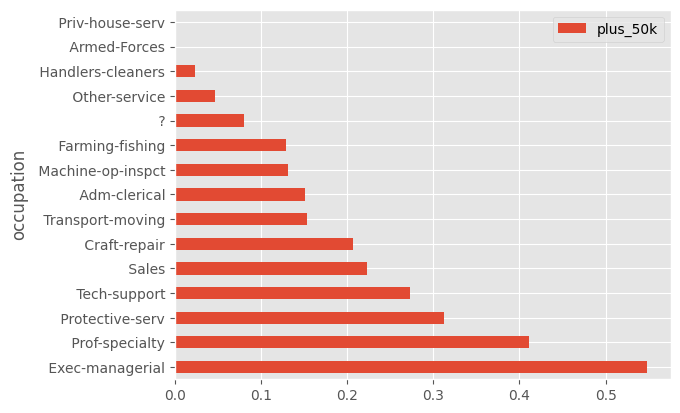

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
myplot = df_pandas.plot(kind='barh', x='occupation', y='plus_50k')

In [ ]:
df_adult.select(df_adult['age'],df_adult['education_num']).describe().show()

+-------+------------------+-----------------+
|summary|               age|    education_num|
+-------+------------------+-----------------+
|  count|              1000|             1000|
|   mean|            38.032|           10.081|
| stddev|13.361643218912457|2.546944429296787|
|    min|                17|                1|
|    max|                90|                9|
+-------+------------------+-----------------+



# Logistic Regression

In [ ]:
#Investigate the data types of the columns:
df_adult.printSchema()

root
 |-- age: string (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: string (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: string (nullable = true)
 |-- capital_loss: string (nullable = true)
 |-- hours_per_week: string (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [ ]:
#Identify the columns with string data type:
string_cols = [col for col, dtype in df_adult.dtypes if dtype == "string"]

In [ ]:
#Convert the string columns to numeric data types:
from pyspark.sql.types import DoubleType

for col in string_cols:
    df_adult = df_adult.withColumn(col, df_adult[col].cast(DoubleType()))

In [ ]:
df_adult.printSchema()

root
 |-- age: double (nullable = true)
 |-- workclass: double (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: double (nullable = true)
 |-- education_num: double (nullable = true)
 |-- marital_status: double (nullable = true)
 |-- occupation: double (nullable = true)
 |-- relationship: double (nullable = true)
 |-- race: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- native_country: double (nullable = true)
 |-- income: double (nullable = true)



In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
stages = [] # stages in our Pipeline

for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [ ]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="income", outputCol="label")
stages += [label_stringIdx]

In [ ]:
# Transform all features into a vector using VectorAssembler
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df_adult)
dataset = pipelineModel.transform(df_adult)
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset)

IllegalArgumentException: requirement failed: The input column workclassIndex should have at least two distinct values.